<a href="https://colab.research.google.com/github/emilycerqueiiro/emilycerqueiiro/blob/main/Abortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         total number of values  percentage of missing values  cardinality  \
age                       19584                      0.000000            6   
year                      19584                      0.000000           16   
totpop                    19584                      0.000000         9269   
crack                     19584                      0.000000          816   
alcohol                   19584                      0.000000          211   
poverty                   19584                      0.000000          177   
lnr                       17921                      8.491626         9330   

                 min           max  1st quartile   3rd quartile  \
age        15.000000  4.000000e+01     20.000000      35.000000   
year     1985.000000  2.000000e+03   1988.750000    1996.250000   
totpop      0.000000  1.606397e+06  18244.500

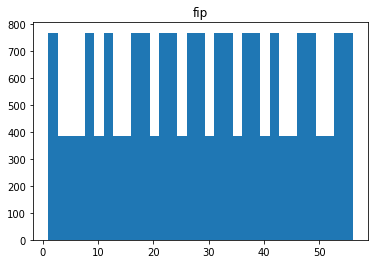

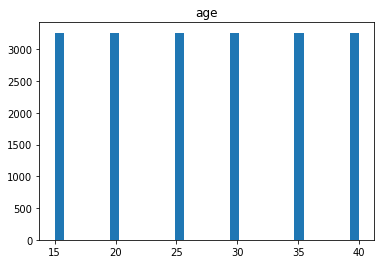

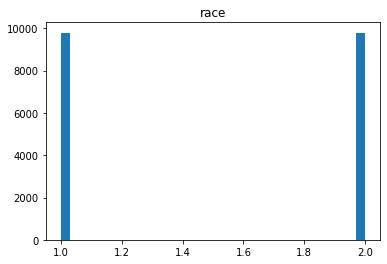

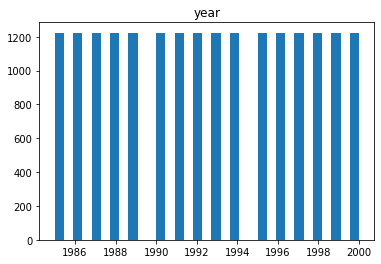

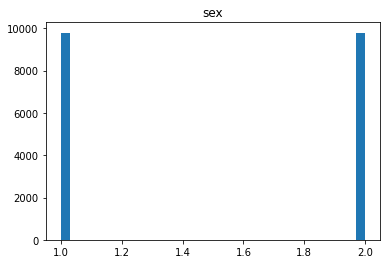

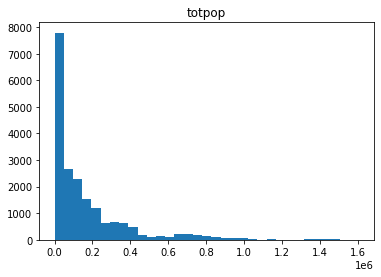

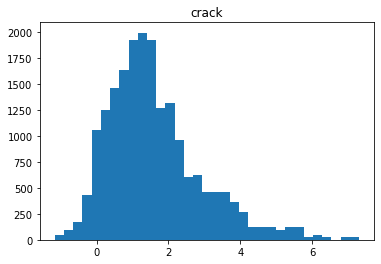

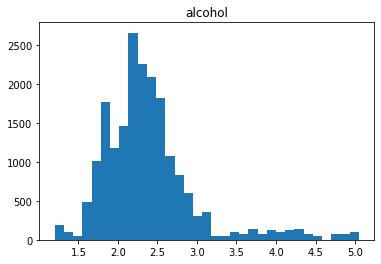

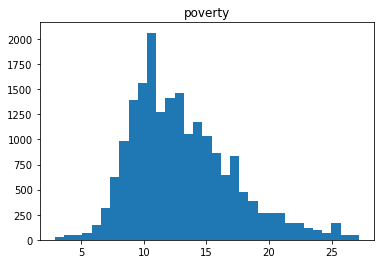

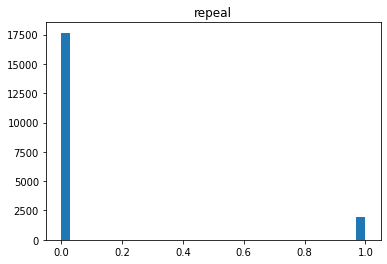

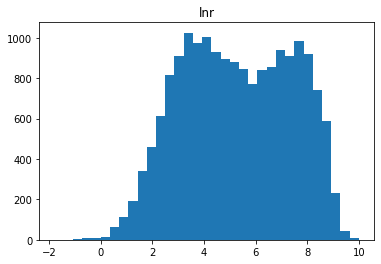

<ipython-input-20-19b91cfd1f0c>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMissing['lnr'] = y_test


In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/abortion.csv')

dataNumeric = data.iloc[:, [2, 4, 6, 8, 9, 12, 17]]

nameColumns = dataNumeric.columns #get names of the columns

missingValues = dataNumeric.isna().sum()
missingPercent = pd.Series(missingValues / len(dataNumeric) * 100)
cardinality =  pd.Series(dataNumeric.nunique())
standardDesviation =  pd.Series(dataNumeric.std())
numValues = pd.Series(dataNumeric.count())
info = pd.DataFrame({
            'total number of values': numValues, 
            'percentage of missing values': missingPercent,
            'cardinality': cardinality,
            'min': pd.Series(dataNumeric.min()),
            'max': pd.Series(dataNumeric.max()),
            '1st quartile': pd.Series(dataNumeric.quantile(0.25)), 
            '3rd quartile': pd.Series(dataNumeric.quantile(0.75)),
            'average': pd.Series(dataNumeric.mean()),
            'median': pd.Series(dataNumeric.median()), 
            'Standard deviation': standardDesviation})

print(info)

dataCategorical = data.iloc[:, [1, 3, 5, 13]]
nameCategorical = dataCategorical.columns
numValues1 = pd.Series(dataCategorical.count())
missingValues1 = dataCategorical.isna().sum()
missingPercent1 = pd.Series(missingValues1 / len(dataCategorical) * 100)
cardinality1 =  pd.Series(dataCategorical.nunique())
standardDesviation1 =  pd.Series(dataCategorical.std())

stats1 = pd.DataFrame({
            'total number of values': numValues1, 
            'percentage of missing values': missingPercent1,
            'cardinality': cardinality1,
            'mode': pd.Series(dataCategorical.mode().iloc[0]),
            'frequency value of the mode': pd.Series(dataCategorical.mode().count().iloc[0]),
            'percentage value of the mode': pd.Series(dataCategorical.value_counts(normalize=True).iloc[0]*100), 
            '2nd mode value':  pd.Series(dataCategorical.mode().iloc[1]) if len(dataCategorical.mode()) > 1 else '',
            '2nd mode frequency value': dataCategorical[dataCategorical != dataCategorical.mode().iloc[0]].mode().count().iloc[0] if len(dataCategorical.mode()) > 1 else '',
            'Percentage of 2nd mode': dataCategorical[dataCategorical != dataCategorical.mode().iloc[0]].value_counts(normalize=True).iloc[0]*100 if len(dataCategorical.mode()) > 1 else ''
              })
print(stats1)




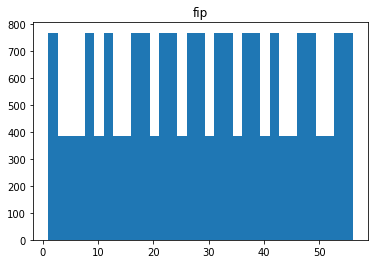

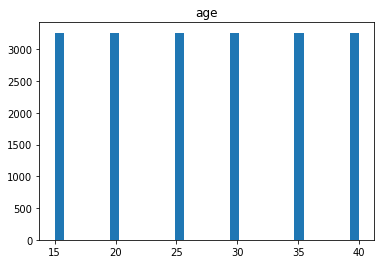

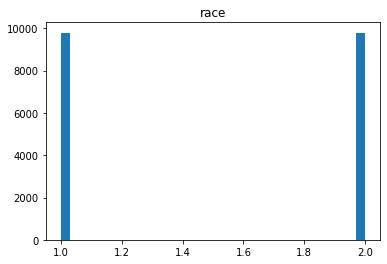

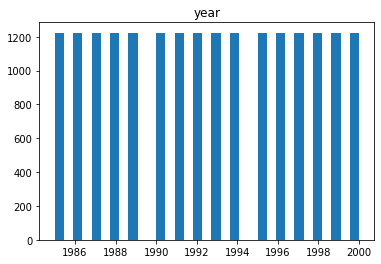

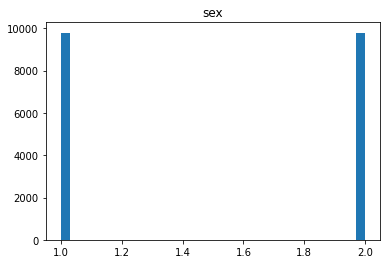

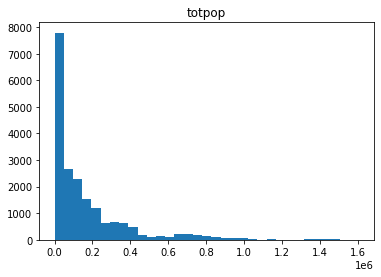

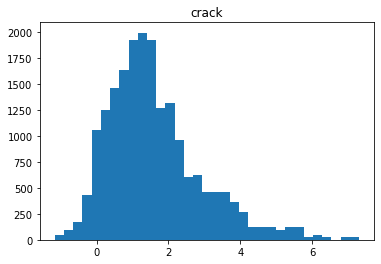

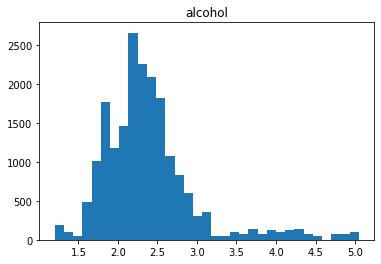

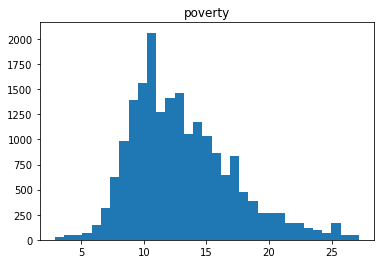

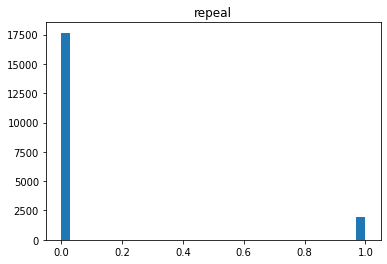

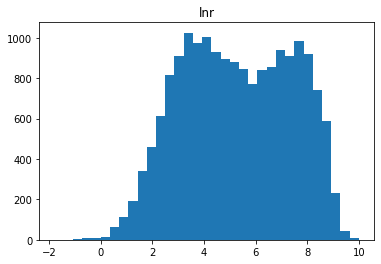

In [4]:
# 4. histograms creation
import pandas as pd
data1 = data.iloc[:, [1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 17]]

n = int(round(1 + (3.22*math.log(len(data1)))))

for col in data1.columns:
  plt.hist(data1[col], bins = n)
  plt.title(col)
  plt.show()

In [ ]:
# 5.1. quality problems

dataNoMissing = data1.dropna()
dataMissing = data1[data1.isnull().any(axis=1)]

# separar las variables predictoras y la variable objetivo
x_train = dataNoMissing.drop('lnr', axis=1)
y_train = dataNoMissing['lnr']
x_test = dataMissing.drop('lnr', axis=1)

# crear el modelo de regresión lineal
model = LinearRegression()

# entrenar el modelo en el conjunto de datos sin valores faltantes
model.fit(x_train, y_train)

# predecir los valores faltantes usando el modelo entrenado
y_test = model.predict(x_test)

dataMissing['lnr'] = y_test
data1 = pd.concat([dataMissing, dataNoMissing])

# guardar la base de datos completada
data.to_csv('dataCompleted.csv', index=False)

In [7]:
# 5.2. extreme values
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/abortion.csv')
data1 = data.iloc[:, [1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 17]]

stats = data1.describe()

# Identify extremes values
outliers = {}
for col in data1.columns:
    mean = stats.loc['mean', col]
    std = stats.loc['std', col]
    max_val = mean + (2 * std)
    min_val = mean - (2 * std)
    outliers[col] = [max_val, min_val]

# Reemplazar valores extremos
for col in data1.columns:
    max_val, min_val = outliers[col]
    data1[col] = data1[col].apply(lambda x: stats.loc['mean', col] if x > max_val or x < min_val else x)

# Verificar los nuevos estadísticos resumidos
new_stats = data1.describe()

diff = (stats == new_stats)

# Verificar si hay alguna diferencia en las estadísticas resumidas
if diff.any().any():
    # Filtrar la tabla de valores booleanos para obtener solo las columnas con diferencias
    diff_cols = diff.loc[:, diff.any()]
    # Imprimir solo las columnas con diferencias
    print(diff_cols)
else:
    print("There is no differences in the statistics.")

<ipython-input-7-9e605946dc6b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = data1[col].apply(lambda x: stats.loc['mean', col] if x > max_val or x < min_val else x)


        fip   age  race  year   sex  totpop  crack  alcohol  poverty  repeal  \
count  True  True  True  True  True    True   True     True     True    True   
mean   True  True  True  True  True   False  False    False    False   False   
std    True  True  True  True  True   False  False    False    False   False   
min    True  True  True  True  True    True  False     True    False    True   
25%    True  True  True  True  True    True  False     True    False    True   
50%    True  True  True  True  True    True  False     True     True    True   
75%    True  True  True  True  True   False  False    False    False    True   
max    True  True  True  True  True   False  False    False    False   False   

         lnr  
count   True  
mean   False  
std    False  
min    False  
25%    False  
50%    False  
75%    False  
max    False  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


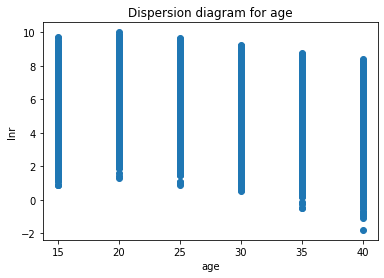

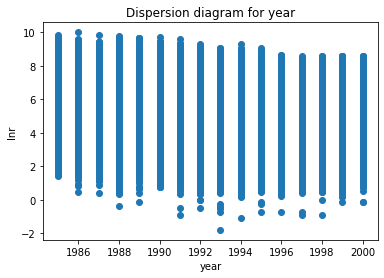

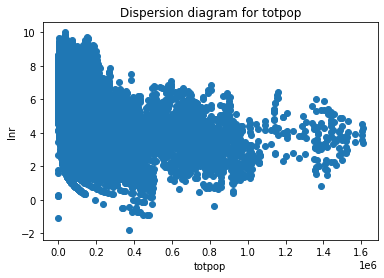

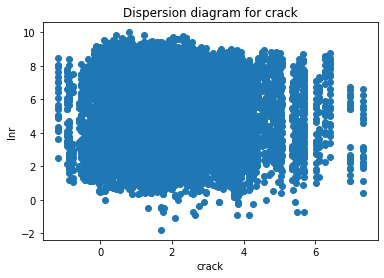

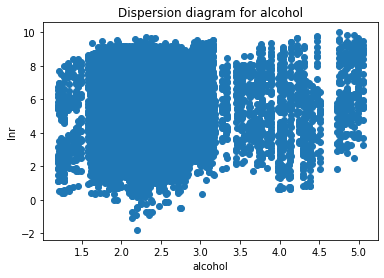

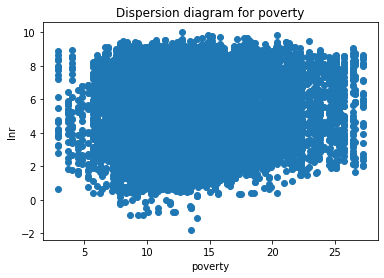

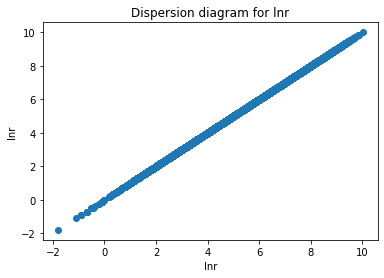

In [17]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/abortion.csv')

dataNumeric = data.iloc[:, [2, 4, 6, 8, 9, 12, 17]]

columns = dataNumeric.columns

# Iterar sobre todas las columnas
for col in columns:
    # Crear un gráfico de dispersión para la columna actual
    plt.scatter(dataNumeric[col], dataNumeric['lnr'])
    # Configurar el título y las etiquetas de los ejes
    plt.title(f'Dispersion diagram for {col}')
    plt.xlabel(col)
    plt.ylabel('lnr')
    # Mostrar el gráfico
    plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


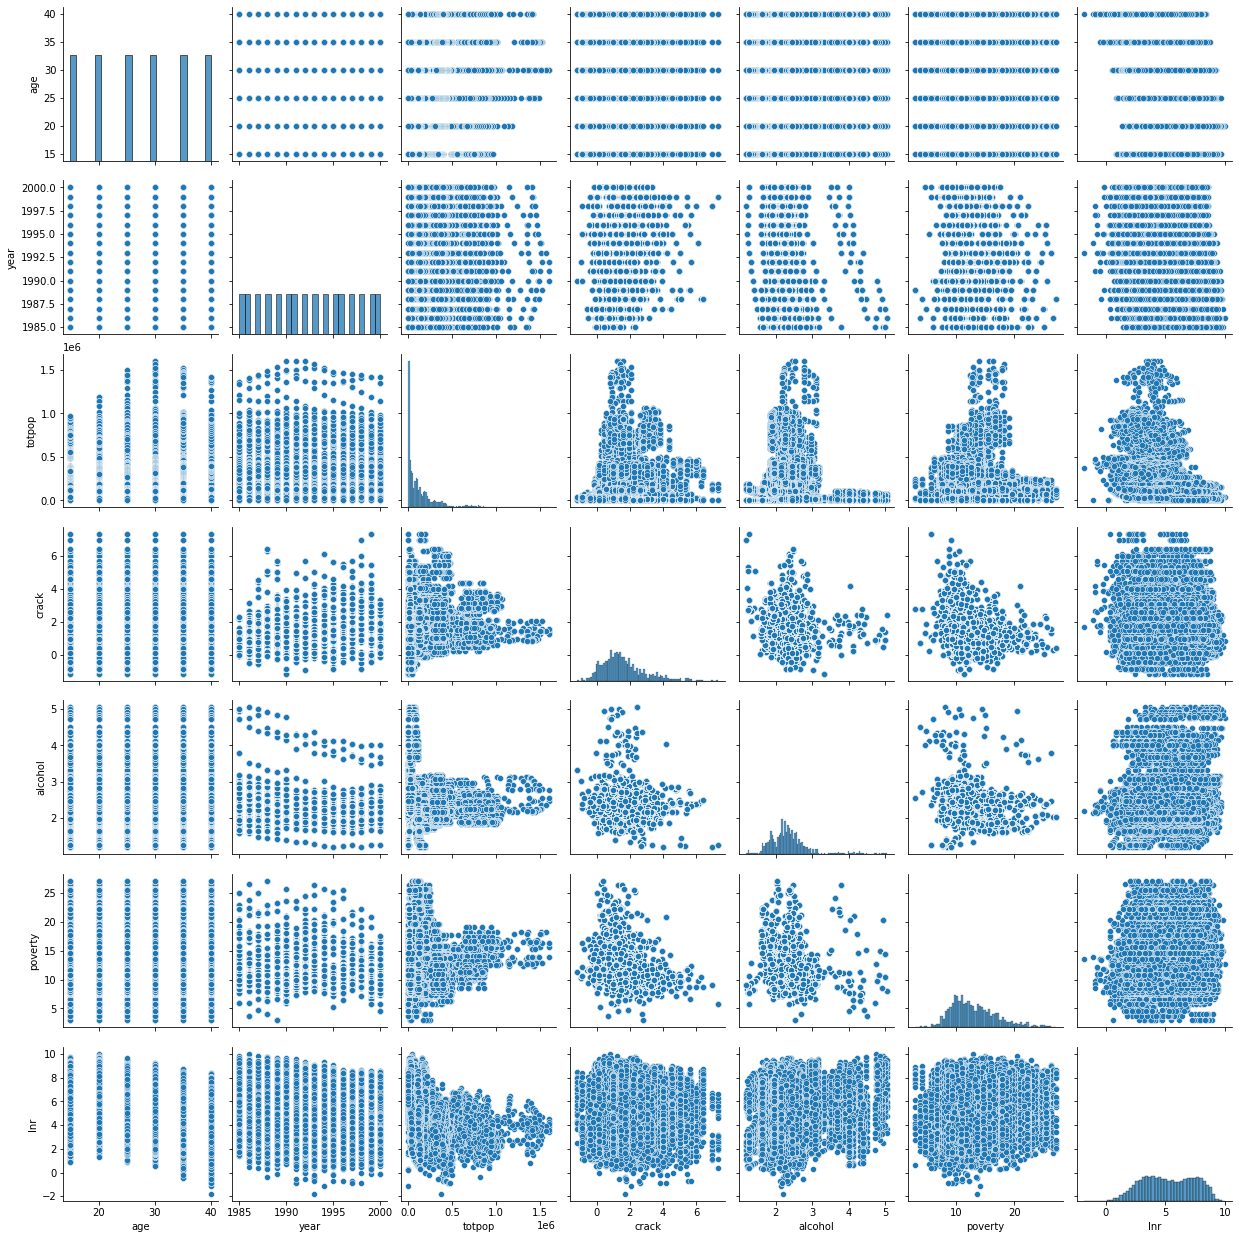

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/abortion.csv')

dataNumeric = data.iloc[:, [2, 4, 6, 8, 9, 12, 17]]

sns.pairplot(dataNumeric)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


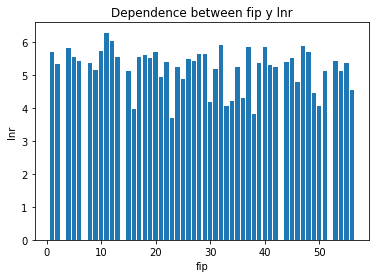

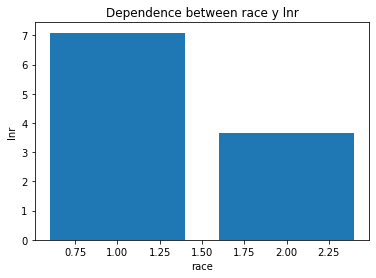

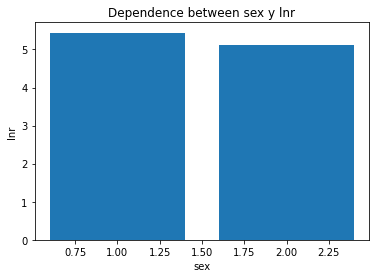

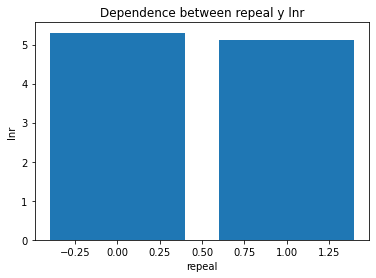

ValueError: ignored

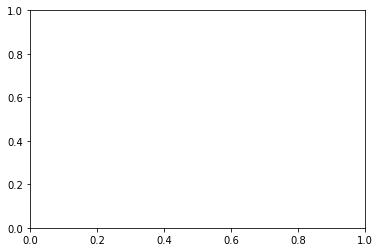

In [24]:
# EXERCISE 6: CATEGORICAL
# bar plot type diagram to relacionate dependence between attributes
# OPTION 1
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/abortion.csv')

dataCategorical = data.iloc[:, [1, 3, 5, 13, 17]]
columnsCategorical = dataCategorical.columns

for col in columnsCategorical:
    plt.figure()
    plt.bar(dataCategorical[col]¡, dataCategorical['lnr'])
    plt.title('Dependence between ' + col + ' y ' + 'lnr')
    plt.xlabel(col)
    plt.ylabel('lnr')
    plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


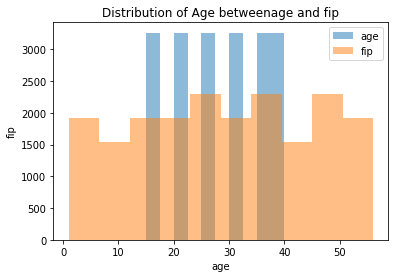

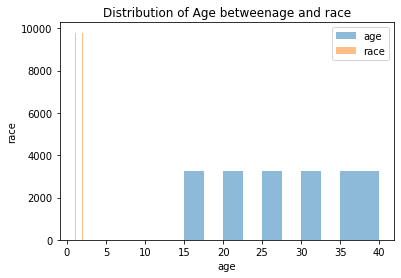

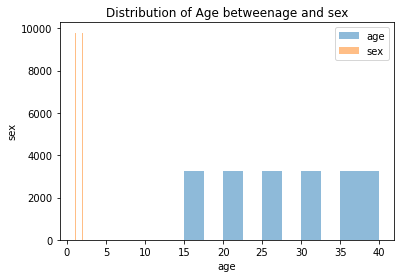

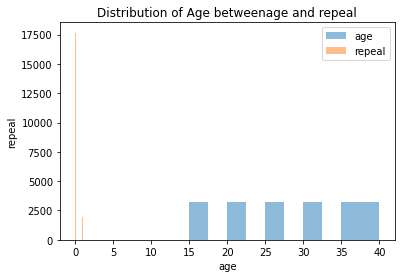

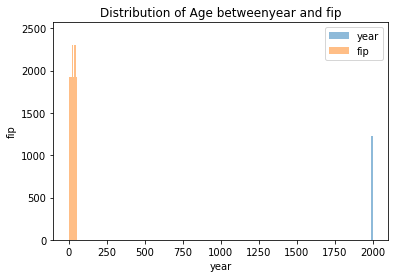

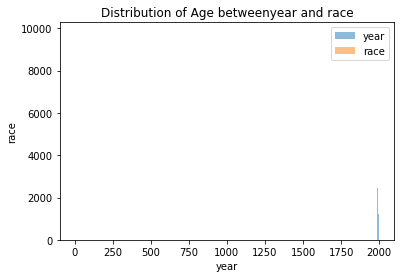

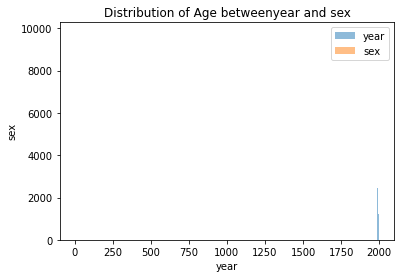

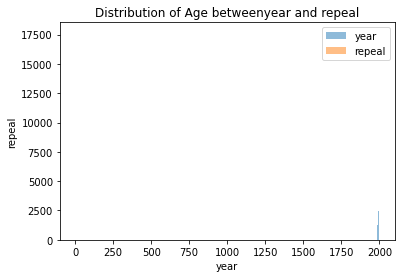

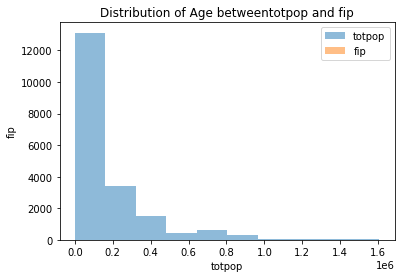

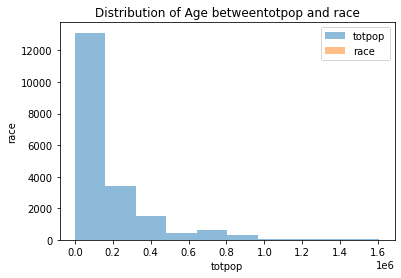

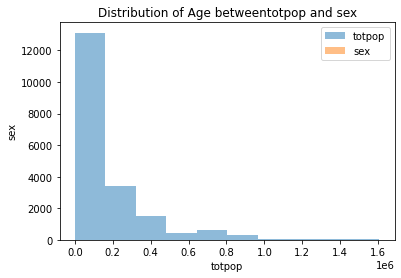

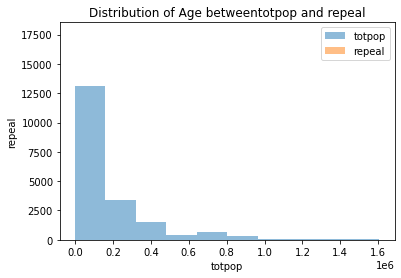

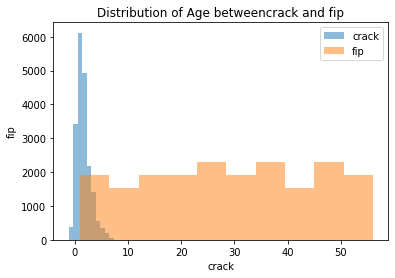

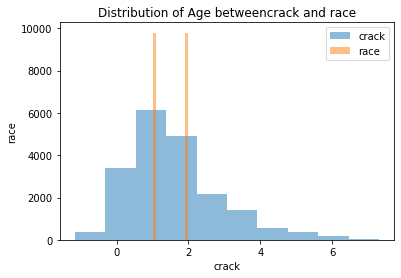

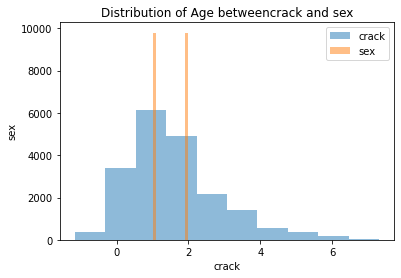

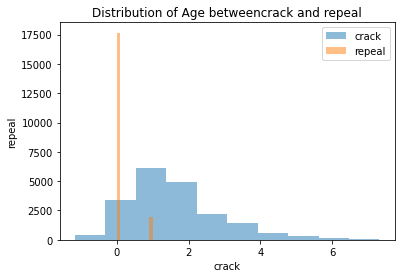

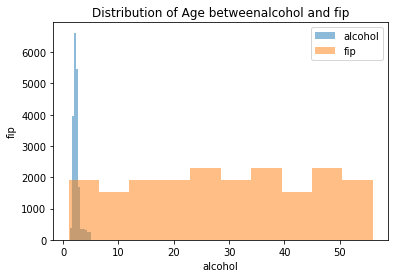

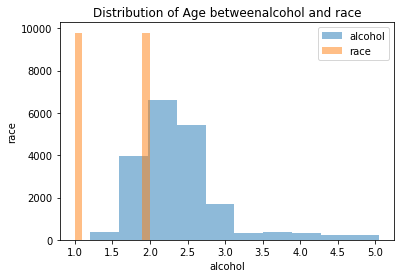

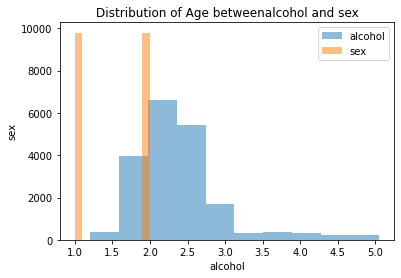

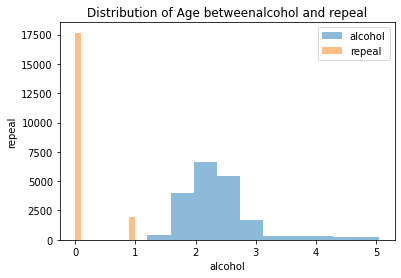

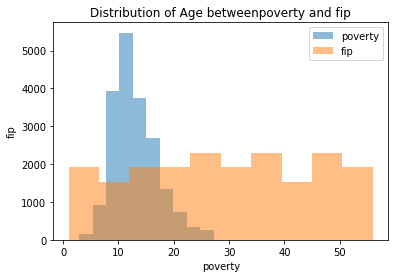

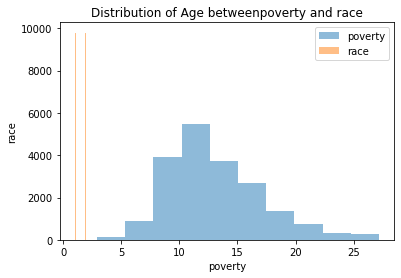

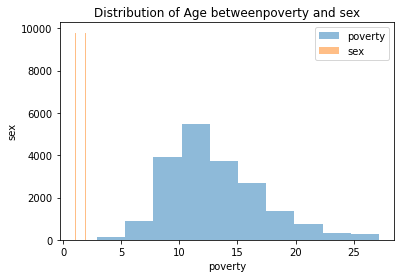

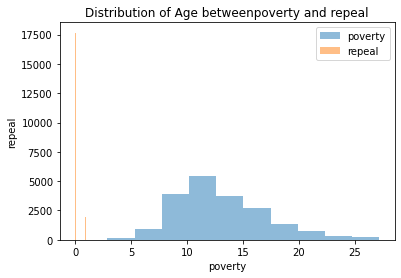

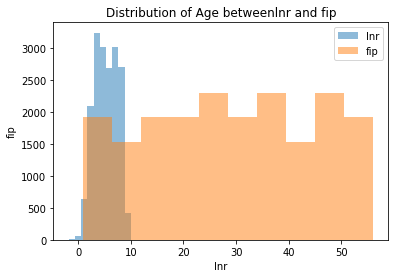

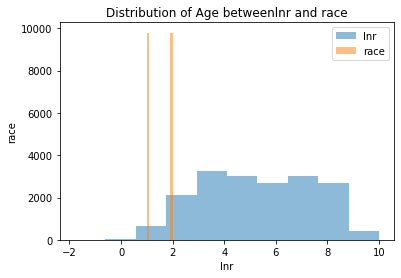

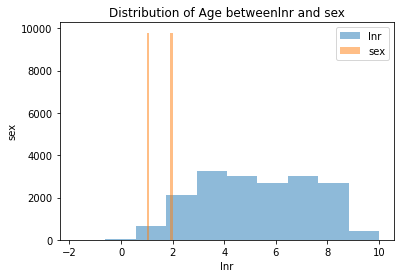

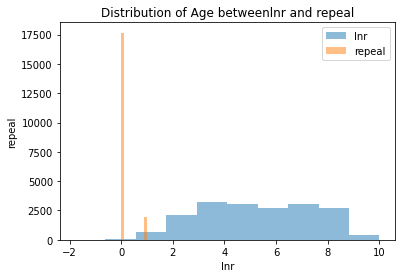

In [26]:
# EXERCISE 6: CATEGORICAL
# bar plot type diagram to relacionate dependence between attributes
# OPTION 2


import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/abortion.csv')

# cargar los datos
dataCategorical = data.iloc[:, [1, 3, 5, 13]]
columnsCategorical = dataCategorical.columns

dataNumeric = data.iloc[:, [2, 4, 6, 8, 9, 12, 17]]

for col1 in dataNumeric.columns:
  for col2 in (dataCategorical.columns):
    plt.hist(dataNumeric[col1], bins=10, alpha=0.5, label=col1)
    plt.hist(dataCategorical[col2], bins=10, alpha=0.5, label=col2)
    plt.legend(loc="upper right")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Distribution of Age between' + col1 + ' and ' + col2)
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


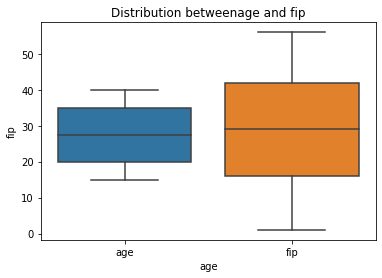

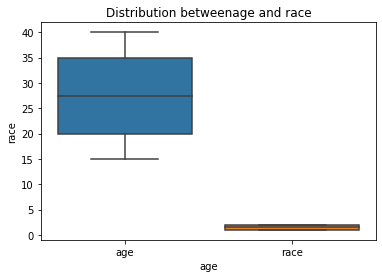

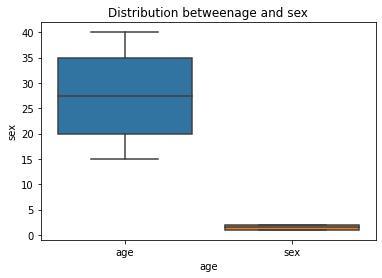

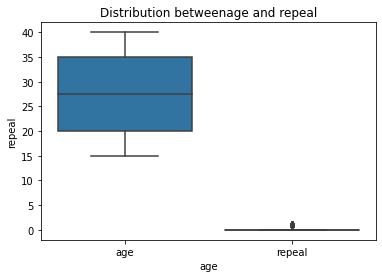

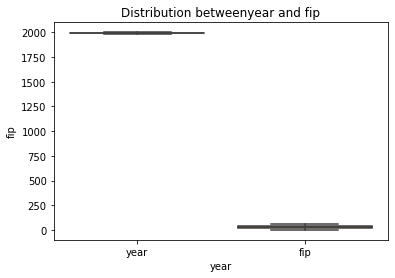

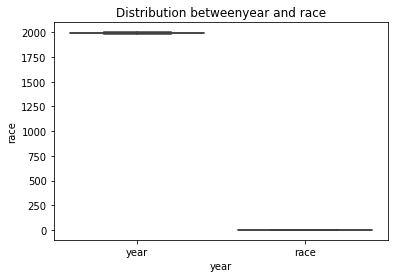

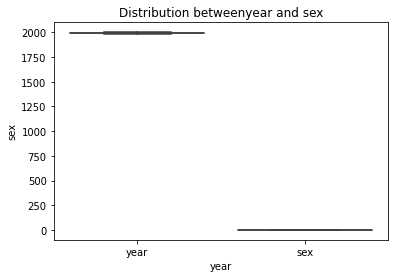

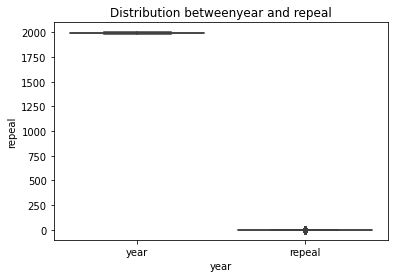

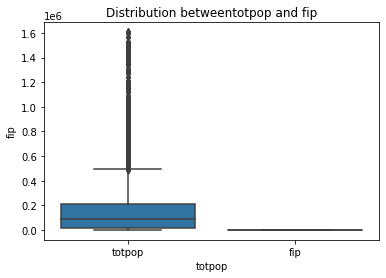

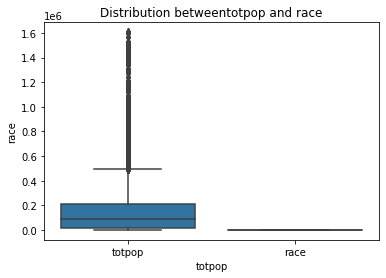

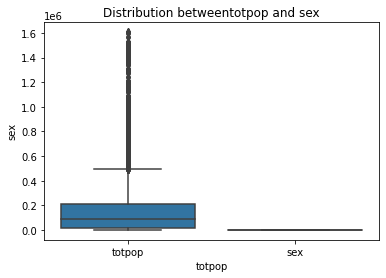

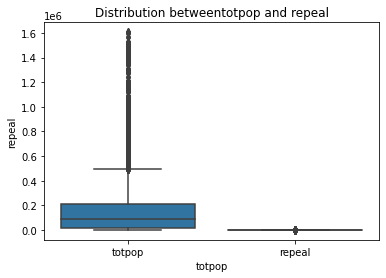

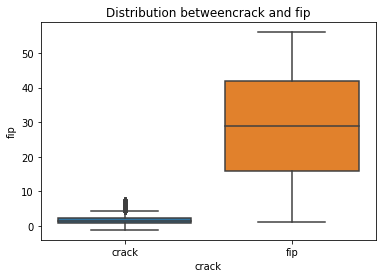

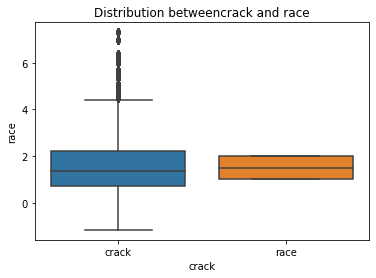

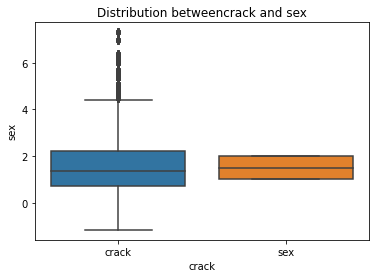

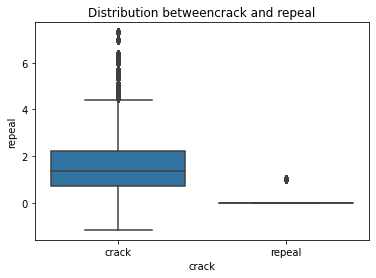

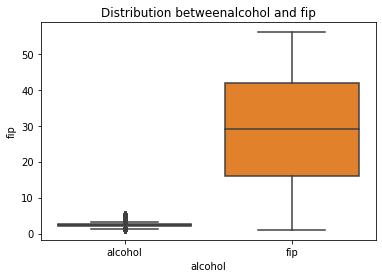

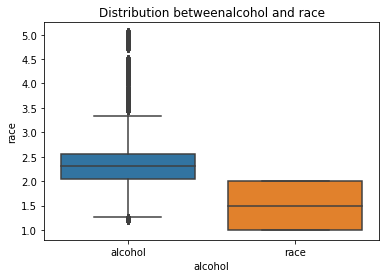

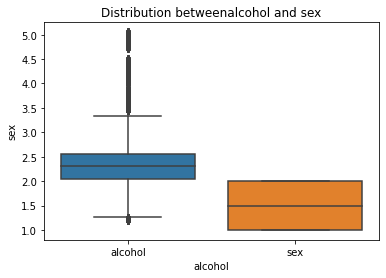

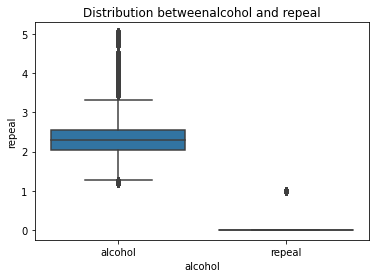

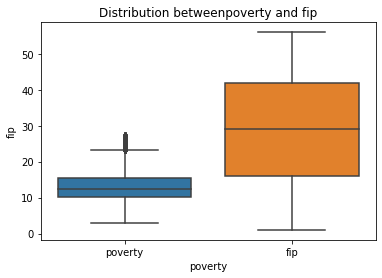

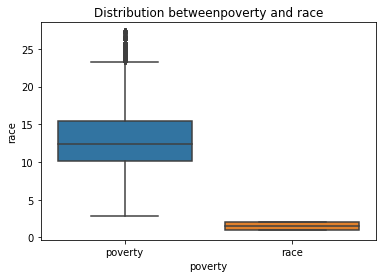

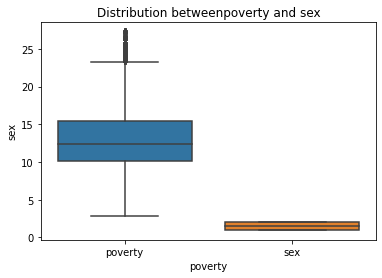

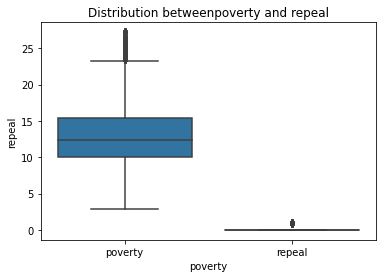

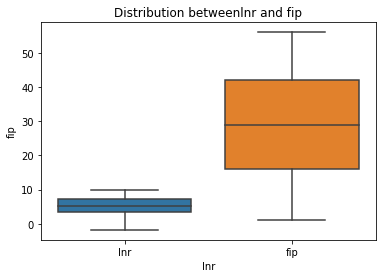

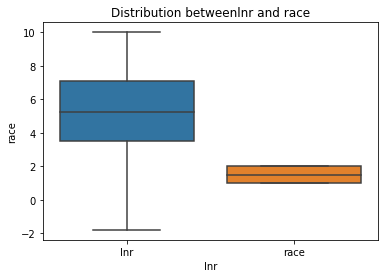

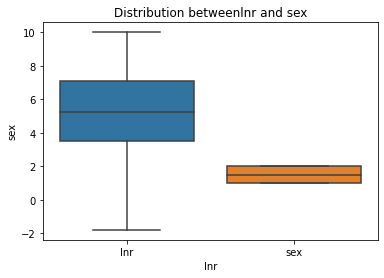

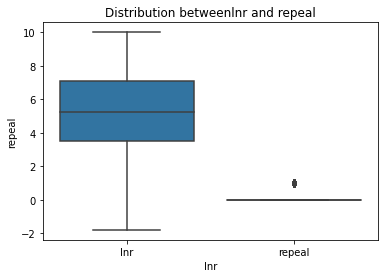

In [32]:
#EXERCISE 6: categorical
#box plot


import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/abortion.csv')

# cargar los datos
dataCategorical = data.iloc[:, [1, 3, 5, 13]]
dataNumeric = data.iloc[:, [2, 4, 6, 8, 9, 12, 17]]

for col1 in dataNumeric.columns:
  for col2 in (dataCategorical.columns):
      sns.boxplot(x='variable', y = 'value', data=pd.melt(pd.DataFrame({col1: dataNumeric[col1], col2: dataCategorical[col2]})))
      plt.xlabel(col1)
      plt.ylabel(col2)
      plt.title('Distribution between' + col1 + ' and ' + col2)
      plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


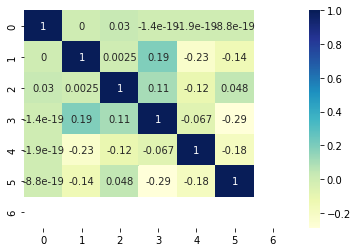

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/abortion.csv')

dataNumeric = data.iloc[:, [2, 4, 6, 8, 9, 12, 17]]

# covariance matrix
covariance_matrix = np.cov(dataNumeric.T)

# correlation matrix
correlation_matrix = np.corrcoef(dataNumeric.T)

# correlation matrix heat map
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")




In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/abortion.csv')

data1 = data.iloc[:, [2, 4, 6, 8, 9, 12, 17]]

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
dataNormalization = scaler.fit_transform(data1)

print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Unnamed: 0  fip  age  race  year  sex  totpop           ir     crack  \
0               1    1   30     2  1985    1   78805   371.475800  0.217438   
1               2    1   15     1  1985    2  224003    51.389252  0.217438   
2               3    1   20     2  1985    2   94113   390.875671  0.217438   
3               4    1   20     1  1985    1  252076   100.836800  0.217438   
4               5    1   20     2  1985    1   94113   390.875671  0.217438   
...           ...  ...  ...   ...   ...  ...     ...          ...       ...   
19579       19580   56   15     1  2000    1   36639   195.797516  0.113628   
19580       19581   56   25     2  2000    2     313  2666.666748  0.113628   
19581       19582   56   30     1  2000    1   26371   346.859619  0.113628   
19582       19583   56   35     1  2000    1   32562   365.876282  0.113628   
19